<a href="https://colab.research.google.com/github/omerozsnn/Microsoft-Internship-Deeplearning-Project/blob/main/stock_price_predictions_AAPL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import torch
from torch import nn
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## Prepare Colab

### Connect with drive

In [ ]:
# Device agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Connect drive
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Data

In [ ]:
file_path = '/content/drive/MyDrive/AAPL.csv'

df = pd.read_csv(file_path)
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100178,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.094952,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.087983,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090160,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092774,73449600


In [ ]:
df = df[['Date', 'Close']]
df.head()

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


# Cleaning Data

In [ ]:
# Check for duplicated dates
duplicated_dates = df.index.duplicated(keep=False)
if duplicated_dates.any():
    print("Duplicated dates found:")
    print(df[duplicated_dates])
else:
    print("No duplicated dates found.")

No duplicated dates found.


In [ ]:
# Check for missing values
print("\nChecking for missing values:")
print(df.isnull().sum())


Checking for missing values:
Date     0
Close    0
dtype: int64


In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10468 entries, 0 to 10467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    10468 non-null  object 
 1   Close   10468 non-null  float64
dtypes: float64(1), object(1)
memory usage: 163.7+ KB


,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862


# Data Exploration

Date value is object so we need to change it

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
print(df)

            Date       Close
0     1980-12-12    0.128348
1     1980-12-15    0.121652
2     1980-12-16    0.112723
3     1980-12-17    0.115513
4     1980-12-18    0.118862
...          ...         ...
10463 2022-06-13  131.880005
10464 2022-06-14  132.759995
10465 2022-06-15  135.429993
10466 2022-06-16  130.059998
10467 2022-06-17  131.559998

[10468 rows x 2 columns]


In [ ]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import pandas as pd

# Creating Interactive Plotting
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Date'], y=df['Close'], mode='lines', name='AAPL Close Price'))

fig.update_layout(
    title='Apple Stock Closing Prices',
    xaxis_title='Date',
    yaxis_title='Closing Price',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label='1m', step='month', stepmode='backward'),
                dict(count=6, label='6m', step='month', stepmode='backward'),
                dict(count=1, label='1y', step='year', stepmode='backward'),
                dict(count=5, label='5y', step='year', stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(visible=True),
        type='date'
    ),
    yaxis=dict(fixedrange=False)
)

fig.show()


2019'un son ceyreginde baslayan ve hala devam eden bir trend oldugunu goruyoruz

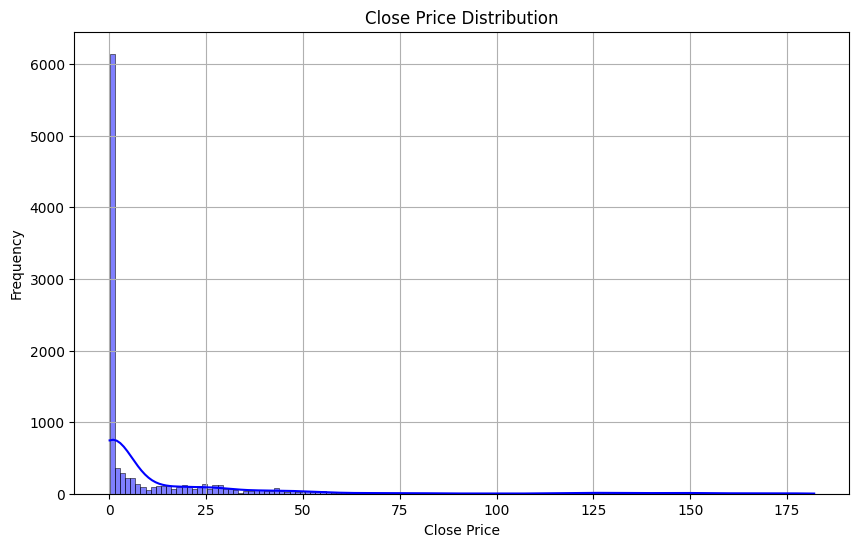

In [ ]:
# Close Price dagilimi
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.grid(True)
plt.title('Close Price Distribution')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
sns.histplot(df['Close'], kde=True, color='blue')
plt.show()

Apple Close Price 1980 ve 2005 yillari arasinda 0 yakin degerlerde oldugu icin dagilim grafiginde 0 in yuksek cogunlukta oldugunu goruyoruz

In [ ]:
df.set_index('Date', inplace=True)
df = df.sort_index()

In [ ]:
df.head()



,Close
Date,
1980-12-12,0.128348
1980-12-15,0.121652
1980-12-16,0.112723
1980-12-17,0.115513
1980-12-18,0.118862


In [ ]:
# Normalize data
scaler = MinMaxScaler(feature_range=(0, 1))
data = df['Close'].values.reshape(-1, 1)
normalized_data = scaler.fit_transform(data)

# Normalize edilmiş veriyi DataFrame'e atama
df['Close'] = normalized_data

# Sonuçları yazdırma
print(df['Close'])

Date
1980-12-12    0.000435
1980-12-15    0.000399
1980-12-16    0.000350
1980-12-17    0.000365
1980-12-18    0.000383
                ...   
2022-06-13    0.724501
2022-06-14    0.729337
2022-06-15    0.744011
2022-06-16    0.714499
2022-06-17    0.722743
Name: Close, Length: 10468, dtype: float64


In [ ]:
df.head()


,Close
Date,
1980-12-12,0.000435
1980-12-15,0.000399
1980-12-16,0.000350
1980-12-17,0.000365
1980-12-18,0.000383


# Splitting Data Train and Test Set

In [ ]:
# Create train and test dataset and sequence lenght(look_back)
def load_data(stock, look_back):
    data_raw = stock.values  # convert to numpy array
    data = []

    # create all possible sequences of length look_back
    for index in range(len(data_raw) - look_back):
        data.append(data_raw[index: index + look_back])

    data = np.array(data)
    test_set_size = int(np.round(0.1 * data.shape[0]))
    train_set_size = data.shape[0] - test_set_size

    X_train = data[:train_set_size, :-1, :]
    y_train = data[:train_set_size, -1, :]

    X_test = data[train_set_size:, :-1]
    y_test = data[train_set_size:, -1, :]

    return [X_train, y_train, X_test, y_test]

look_back = 30  # choose sequence length
X_train, y_train, X_test, y_test = load_data(df, look_back)
print('X_train.shape = ', X_train.shape)
print('y_train.shape = ', y_train.shape)
print('X_test.shape = ', X_test.shape)
print('y_test.shape = ', y_test.shape)

X_train.shape =  (9394, 29, 1)
y_train.shape =  (9394, 1)
X_test.shape =  (1044, 29, 1)
y_test.shape =  (1044, 1)


### Transfor to the Tensor


In [ ]:
import torch
import torch.nn as nn

# Convert to PyTorch tensors
X_train = torch.from_numpy(X_train).type(torch.Tensor).to(device)
X_test = torch.from_numpy(X_test).type(torch.Tensor).to(device)
y_train = torch.from_numpy(y_train).type(torch.Tensor).to(device)
y_test = torch.from_numpy(y_test).type(torch.Tensor).to(device)

In [ ]:
y_train.size(), X_train.size()

(torch.Size([9394, 1]), torch.Size([9394, 29, 1]))

In [ ]:
# Hyperparameter
input_size = 1
hidden_size = 50
num_layers = 2
output_size = 1
num_epochs = 100
learning_rate = 0.001
patience = 30

# Build Model

## LSTM Model

In [ ]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers, dropout_prob=0.2 ):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout_prob)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, X):
        # Initialize h0 and c0 with the correct dimensions (num_layers, batch_size, hidden_size)
        h0 = torch.zeros(self.num_layers, X.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, X.size(0), self.hidden_size).to(device)

        # Forward pass through LSTM
        out, (hn, cn) = self.lstm(X, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :])
        return out

In [ ]:
model_0 = LSTM(input_size=input_size, hidden_size=hidden_size, output_size=output_size, num_layers=num_layers, ).to(device)
model_0

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)

## loss function and Optimizer

In [ ]:
loss_fn = nn.MSELoss()

optimizer = torch.optim.Adam(model_0.parameters(), lr=learning_rate)


# Training and testing loops

In [ ]:
# Traning
losses = []
test_losses = []
best_loss = float('inf')
patience_counter = 0
epochs = num_epochs
for epoch in tqdm(range(epochs)):
    model_0.train()
    y_pred = model_0(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss)
    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}")
       # Early stopping
    if loss < best_loss:
            best_loss = loss
            patience_counter = 0
    else:
            patience_counter += 1

    if patience_counter > patience:
            print("Early stopping")
            break
    # Backpropagation and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        test_pred = model_0(X_test)
        test_loss = loss_fn(test_pred, y_test)
        test_losses.append(test_loss.item())

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | test_loss: {test_loss} ")



  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 0, Loss: 4.149258165853098e-05
Epoch: 0 | test_loss: 0.010334376245737076 
Epoch: 10, Loss: 3.712077523232438e-05
Epoch: 10 | test_loss: 0.008293995633721352 
Epoch: 20, Loss: 3.442848174017854e-05
Epoch: 20 | test_loss: 0.008534273132681847 
Epoch: 30, Loss: 3.155334707116708e-05
Epoch: 30 | test_loss: 0.007714970037341118 
Epoch: 40, Loss: 3.154687146889046e-05
Epoch: 40 | test_loss: 0.007608343381434679 
Epoch: 50, Loss: 2.9115861252648756e-05
Epoch: 50 | test_loss: 0.007203597575426102 
Epoch: 60, Loss: 2.8092081265640445e-05
Epoch: 60 | test_loss: 0.007046860177069902 
Epoch: 70, Loss: 2.5493243811069988e-05
Epoch: 70 | test_loss: 0.006832069717347622 
Epoch: 80, Loss: 2.488768586772494e-05
Epoch: 80 | test_loss: 0.0067902542650699615 
Epoch: 90, Loss: 2.459073039062787e-05
Epoch: 90 | test_loss: 0.006658433936536312 


In [ ]:
# Denormalize step
train_preds = model_0(X_train).detach().cpu().numpy()
train_preds = scaler.inverse_transform(train_preds)
y_train_denorm = scaler.inverse_transform(y_train.cpu().numpy())

test_preds = model_0(X_test).detach().cpu().numpy()
test_preds = scaler.inverse_transform(test_preds)
y_test_denorm = scaler.inverse_transform(y_test.cpu().numpy())

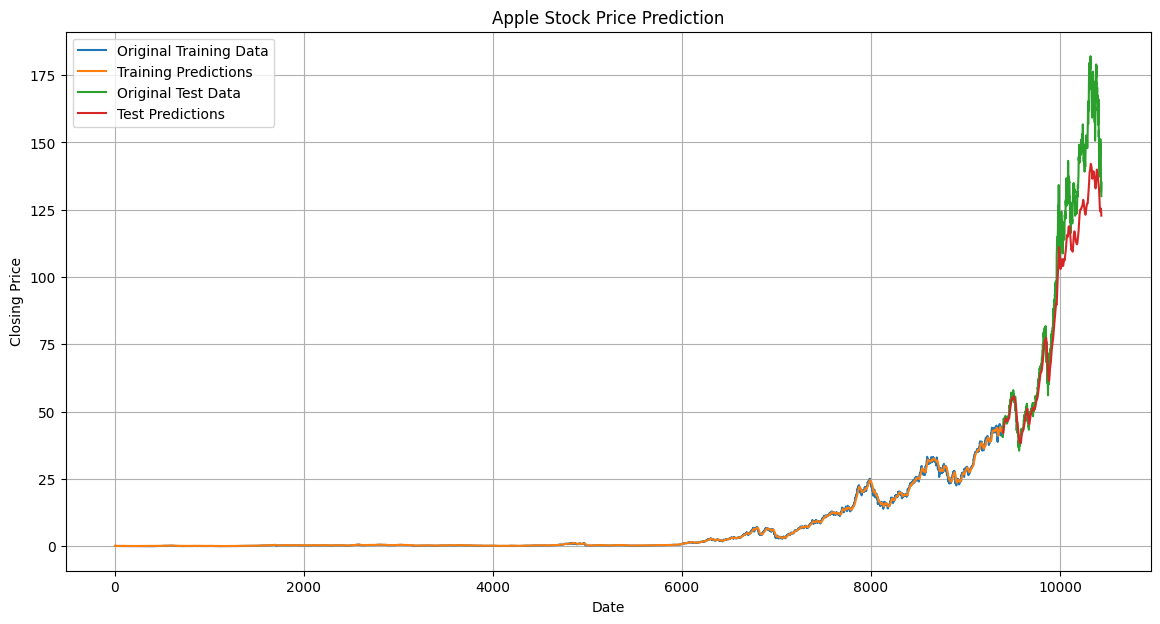

In [ ]:
# Görselleştirme
plt.figure(figsize=(14, 7))

# Eğitim seti tahminleri
plt.plot(y_train_denorm, label='Original Training Data')
plt.plot(train_preds, label='Training Predictions')

# Test seti tahminleri
plt.plot(range(len(y_train_denorm), len(y_train_denorm) + len(y_test_denorm)), y_test_denorm, label='Original Test Data')
plt.plot(range(len(y_train_denorm), len(y_train_denorm) + len(test_preds)), test_preds, label='Test Predictions')

plt.title('Apple Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Calculate performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# For training data
train_mse = mean_squared_error(y_train_denorm, train_preds)
train_rmse = np.sqrt(train_mse)
train_mae = mean_absolute_error(y_train_denorm, train_preds)
train_r2 = r2_score(y_train_denorm, train_preds)

# For test data
test_mse = mean_squared_error(y_test_denorm, test_preds)
test_rmse = np.sqrt(test_mse)
test_mae = mean_absolute_error(y_test_denorm, test_preds)
test_r2 = r2_score(y_test_denorm, test_preds)

print("Conclusion:")
print("===========")
print("Model Performance:")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Training MSE: {train_mse:.2f}")

print("\n")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Test MSE: {test_mse:.2f}")


Conclusion:
Model Performance:
Training RMSE: 0.40
Training MSE: 0.16


Test RMSE: 14.95
Test MSE: 223.37


# Conclusion

Traning Performance RMSE ve MSE oldukca dusuk. Modeli duzgun bir sekilde egitmeyi basarmis oldum. Test verilerini analiz ettigimde ise egitim setine asiri uyum sagladigini gordum(overfitting). Bu sorunu cozmek icin birden fazla yontem denedim.

*   Cross Validation
*   Dropout eklemek
*   Early Stopping(train loss - test loss)
*   Hyperparameter Optimizasyonu



